In [ ]:
# 1. Import necessary libraries, such as TensorFlow, PyTorch, or Keras.

# 2. Download and load the CIFAR-10 dataset.

# 3. Normalize pixel values to the [0, 1] range and consider data augmentation techniques.

# 4. Define CNN architecture, ensuring at least two different hidden layer sizes.

# 5. Implement L2 regularization to prevent overfitting.

# 6. Specify loss function, optimizer, and metrics.

# 7. Train the model using the training data.

# 8. Evaluate the model on both training and testing datasets to obtain classification error.

# 9. Repeat the process for different hidden layer sizes and regularization configurations.

# 10. Create a table with classification errors for each configuration.


In [ ]:
#CODE

import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
from keras.regularizers import l2
from sklearn.model_selection import train_test_split
import pandas as pd


In [ ]:
# Step 1: Import Libraries and Load Dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Step 2: Data Preprocessing
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0


In [ ]:
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

datagen.fit(x_train)

# Step 3 and 4: Define CNN Architecture and Add Regularization
hidden_layer_sizes = [128, 64]
regularization_strengths = [0.01, 0.001]

results = []


In [ ]:
for size in hidden_layer_sizes:
    for strength in regularization_strengths:
        # Define CNN architecture with different hidden layer sizes and regularization
        model = Sequential()
        model.add(Conv2D(32, (3, 3), activation='relu', kernel_regularizer=l2(strength), input_shape=(32, 32, 3)))
        model.add(MaxPooling2D((2, 2)))
        model.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(strength)))
        model.add(MaxPooling2D((2, 2)))
        model.add(Flatten())
        model.add(Dense(size, activation='relu', kernel_regularizer=l2(strength)))
        model.add(Dense(10, activation='softmax'))

        # Step 5: Compile Model
        model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

        # Step 6: Train the Model
        history = model.fit(datagen.flow(x_train, to_categorical(y_train), batch_size=64),
                            epochs=10, validation_data=(x_test, to_categorical(y_test)))

        # Step 7: Evaluate Model
        train_loss, train_accuracy = model.evaluate(x_train, to_categorical(y_train))
        test_loss, test_accuracy = model.evaluate(x_test, to_categorical(y_test))

        # Step 8: Store Results
        results.append({
            'Hidden Layer Size': size,
            'Regularization Strength': strength,
            'Train Classification Error': 1 - train_accuracy,
            'Test Classification Error': 1 - test_accuracy
        })



Epoch 1/10
782/782 [==============================] - 109s 138ms/step - loss: 2.0341 - accuracy: 0.3453 - val_loss: 1.7540 - val_accuracy: 0.4284
Epoch 2/10
782/782 [==============================] - 106s 135ms/step - loss: 1.7884 - accuracy: 0.4151 - val_loss: 1.6855 - val_accuracy: 0.4485
Epoch 3/10
782/782 [==============================] - 93s 119ms/step - loss: 1.7300 - accuracy: 0.4337 - val_loss: 1.6037 - val_accuracy: 0.4877
Epoch 4/10
782/782 [==============================] - 90s 115ms/step - loss: 1.6877 - accuracy: 0.4546 - val_loss: 1.5929 - val_accuracy: 0.4910
Epoch 5/10
782/782 [==============================] - 88s 113ms/step - loss: 1.6568 - accuracy: 0.4667 - val_loss: 1.5675 - val_accuracy: 0.5042
Epoch 6/10
782/782 [==============================] - 89s 114ms/step - loss: 1.6353 - accuracy: 0.4757 - val_loss: 1.5501 - val_accuracy: 0.5056
Epoch 7/10
782/782 [==============================] - 90s 115ms/step - loss: 1.6120 - accuracy: 0.4866 - val_loss: 1.5471 - val_

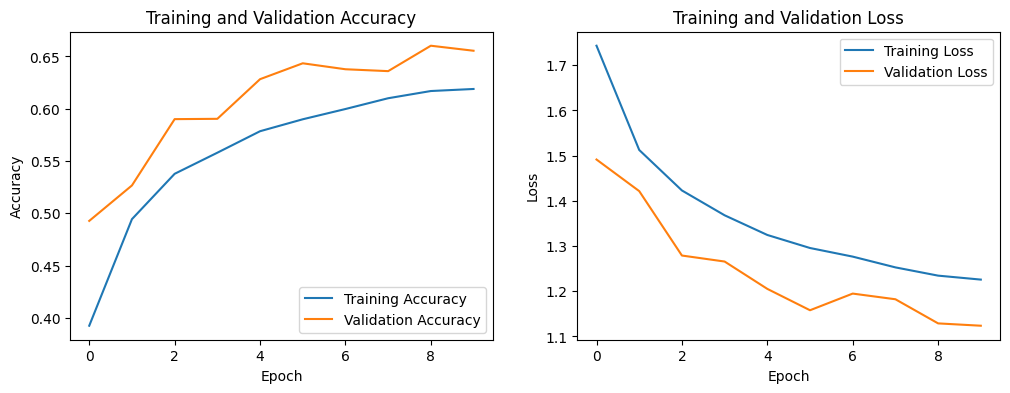

   Hidden Layer Size  Regularization Strength  Train Classification Error  \
0                128                    0.010                     0.44570   
1                128                    0.001                     0.33684   
2                 64                    0.010                     0.47740   
3                 64                    0.001                     0.33606   

   Test Classification Error  
0                     0.4427  
1                     0.3470  
2                     0.4780  
3                     0.3446  


In [ ]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()


plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()


# Step 9: Create a Table with Classification Errors
results_df = pd.DataFrame(results)

# Print the results table
print(results_df)




In [ ]:

# Solution 2:

# Understand the Baseline:

# Carefully read and understand the baseline code provided.
# Identify the architecture, hyperparameters, and training process used in the baseline model.

# Try Different Architectures:

# Modify the baseline architecture by experimenting with different types of RNN architectures, such as LSTM or GRU layers.
# Adjust the number of layers, hidden units, and dropout rates to find a better configuration.

# Train Multiple Models:

# Train multiple language models with different configurations.
# Experiment with varying learning rates, batch sizes, and training epochs.

# Ensemble Models:

# Implement model ensembling by training multiple models and combining their predictions.
# You can use techniques like averaging or weighted averaging to ensemble the outputs of multiple models.

# Implement Regularization Techniques:

# Apply regularization techniques, such as dropout or L2 regularization, to prevent overfitting.
# Optimize Hyperparameters:

# Conduct a hyperparameter search to find optimal values for learning rate, batch size, and other relevant parameters.


# Monitor Training Progress:

# Implement callbacks to monitor training progress and prevent overfitting.
# Visualize training curves, including training and validation loss, to identify potential issues.

# Evaluate Model Performance:

# Evaluate the performance of each modified model on a separate validation set.
# Compare the results against the baseline and identify models that show improvement.


In [1]:
# CODE

import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [4]:
# Load your dataset
with open('human_chat.txt', 'r', encoding='utf-8') as file:
    data = file.readlines()

# Assuming data is a list of conversations
# Preprocess the text data
tokenizer = Tokenizer()
tokenizer.fit_on_texts(data)
total_words = len(tokenizer.word_index) + 1

# Convert text data to sequences
input_sequences = tokenizer.texts_to_sequences(data)


In [5]:
# Create input sequences and corresponding target sequences
sequences = []
for seq in input_sequences:
    for i in range(1, len(seq)):
        n_gram_sequence = seq[:i+1]
        sequences.append(n_gram_sequence)

# Pad sequences for equal length
max_sequence_length = max([len(seq) for seq in sequences])
sequences = pad_sequences(sequences, maxlen=max_sequence_length, padding='pre')

X, y = sequences[:, :-1], sequences[:, -1]

# Split the dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [6]:
# Basic LSTM Model
def build_lstm_model(vocab_size, embedding_dim, lstm_units):
    model = Sequential()
    model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=X.shape[1]))
    model.add(LSTM(units=lstm_units))
    model.add(Dense(units=vocab_size, activation='softmax'))
    model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model


In [7]:
# Ensemble of LSTM Models
def ensemble_models(num_models, vocab_size, embedding_dim, lstm_units):
    models = []
    for _ in range(num_models):
        model = build_lstm_model(vocab_size, embedding_dim, lstm_units)
        models.append(model)
    return models


In [8]:
# Train and Evaluate Models
def train_and_evaluate(models, X_train, y_train, X_val, y_val, epochs, batch_size):
    for i, model in enumerate(models):
        print(f"Training Model {i + 1}...")
        model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_val, y_val))


In [9]:
embedding_dim = 50
lstm_units = 100
num_models = 3

models = ensemble_models(num_models, total_words, embedding_dim, lstm_units)

# Train and Evaluate Ensemble
train_and_evaluate(models, X_train, y_train, X_val, y_val, epochs=5, batch_size=32)

Training Model 1...
Epoch 1/5
527/527 [==============================] - 90s 165ms/step - loss: 6.2281 - accuracy: 0.0534 - val_loss: 5.9531 - val_accuracy: 0.0793
Epoch 2/5
527/527 [==============================] - 76s 144ms/step - loss: 5.6745 - accuracy: 0.0882 - val_loss: 5.8931 - val_accuracy: 0.0921
Epoch 3/5
527/527 [==============================] - 76s 143ms/step - loss: 5.4801 - accuracy: 0.1031 - val_loss: 5.8479 - val_accuracy: 0.1011
Epoch 4/5
527/527 [==============================] - 79s 150ms/step - loss: 5.3015 - accuracy: 0.1147 - val_loss: 5.7942 - val_accuracy: 0.1154
Epoch 5/5
527/527 [==============================] - 75s 142ms/step - loss: 5.1126 - accuracy: 0.1316 - val_loss: 5.7421 - val_accuracy: 0.1242
Training Model 2...
Epoch 1/5
527/527 [==============================] - 78s 142ms/step - loss: 6.2387 - accuracy: 0.0509 - val_loss: 5.9593 - val_accuracy: 0.0748
Epoch 2/5
527/527 [==============================] - 75s 142ms/step - loss: 5.6796 - accuracy: 0

Training Model 1...
Epoch 1/5
527/527 [==============================] - 74s 141ms/step - loss: 3.4532 - accuracy: 0.2709 - val_loss: 6.1391 - val_accuracy: 0.1541
Epoch 2/5
527/527 [==============================] - 75s 142ms/step - loss: 3.3249 - accuracy: 0.2886 - val_loss: 6.2148 - val_accuracy: 0.1527
Epoch 3/5
527/527 [==============================] - 74s 140ms/step - loss: 3.2008 - accuracy: 0.3065 - val_loss: 6.3031 - val_accuracy: 0.1503
Epoch 4/5
527/527 [==============================] - 74s 140ms/step - loss: 3.0813 - accuracy: 0.3319 - val_loss: 6.3749 - val_accuracy: 0.1472
Epoch 5/5
527/527 [==============================] - 73s 139ms/step - loss: 2.9653 - accuracy: 0.3496 - val_loss: 6.4631 - val_accuracy: 0.1489
Training Model 2...
Epoch 1/5
527/527 [==============================] - 75s 142ms/step - loss: 3.4750 - accuracy: 0.2666 - val_loss: 6.0968 - val_accuracy: 0.1550
Epoch 2/5
527/527 [==============================] - 73s 138ms/step - loss: 3.3483 - accuracy: 0

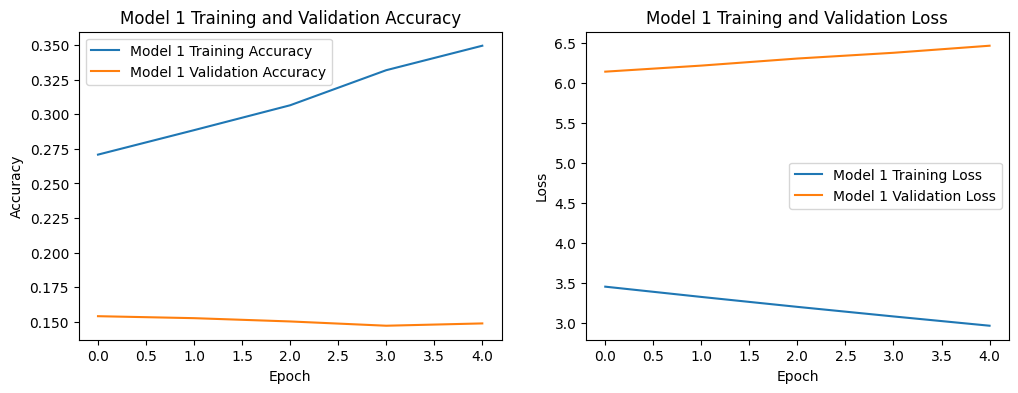

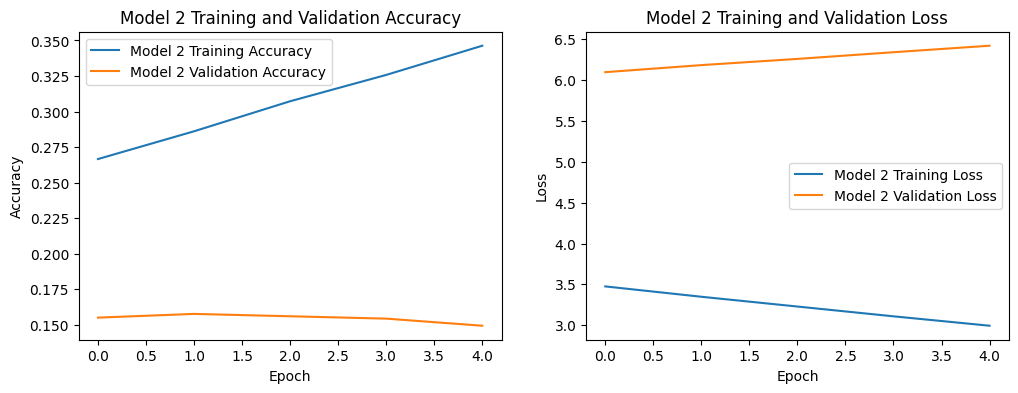

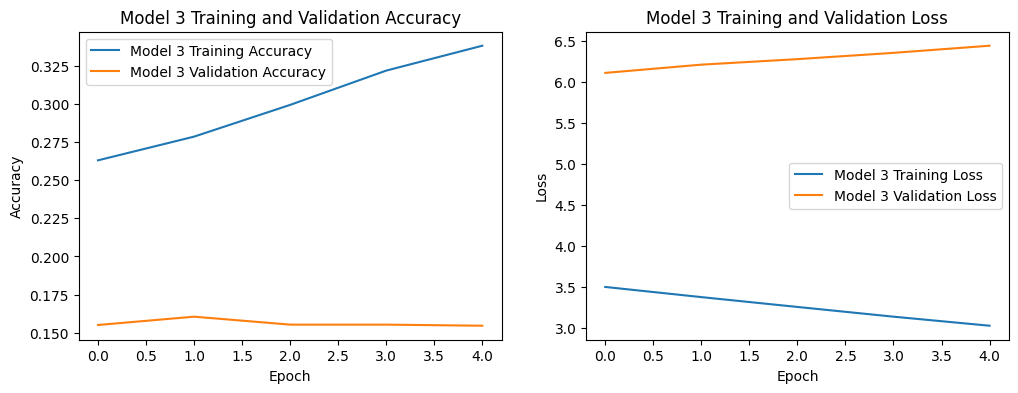

In [12]:
# Modify the train_and_evaluate function
# Modify the train_and_evaluate function
def train_and_evaluate(models, X_train, y_train, X_val, y_val, epochs, batch_size):
    histories = []  # To store the training history of each model

    for i, model in enumerate(models):
        print(f"Training Model {i + 1}...")
        history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_val, y_val))
        histories.append(history)

    return histories


training_histories = train_and_evaluate(models, X_train, y_train, X_val, y_val, epochs=5, batch_size=32)
for i, history in enumerate(training_histories):
    plt.figure(figsize=(12, 4))

    # Plot Training & Validation Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label=f'Model {i + 1} Training Accuracy')
    plt.plot(history.history['val_accuracy'], label=f'Model {i + 1} Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title(f'Model {i + 1} Training and Validation Accuracy')
    plt.legend()

    # Plot Training & Validation Loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label=f'Model {i + 1} Training Loss')
    plt.plot(history.history['val_loss'], label=f'Model {i + 1} Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title(f'Model {i + 1} Training and Validation Loss')
    plt.legend()

    plt.show()